In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Conv1D, MaxPooling1D, Flatten,GRU
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
def train_and_predict_model_lstm(df1, df2, look_back, learning_rate=0.001, epochs=150, batch_size=64):
    features = ['Open', 'High', 'Low', 'Close', 'Volume']
    target = 'Close'
    
    # 数据规范化
    scaler = MinMaxScaler(feature_range=(0, 1))
    df1_scaled = scaler.fit_transform(df1[features])
    df2_scaled = scaler.transform(df2[features])
    
    # 构建训练数据和标签
    def create_dataset(df_scaled):
        X, y = [], []
        for i in range(len(df_scaled) - look_back):
            X.append(df_scaled[i:(i + look_back)])
            y.append(df_scaled[i + look_back, features.index(target)])
        return np.array(X), np.array(y)
    
    X_train, y_train = create_dataset(df1_scaled)
    X_test, y_test = create_dataset(df2_scaled)
    
    # 定义模型
    model = Sequential([
        Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(look_back, len(features))),
        MaxPooling1D(pool_size=2),
        Bidirectional(LSTM(50, return_sequences=False)),
        Dense(1)
    ])
    
    # 编译模型
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    
    # 训练模型
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_test, y_test))
    
    # 进行预测
    predicted_stock_price = model.predict(X_test)
    
    # 反转缩放以得到实际价格
    predicted_stock_price = scaler.inverse_transform(np.tile(predicted_stock_price, (1, len(features))))
    predicted_stock_price = predicted_stock_price[:, features.index(target)]
    
    return predicted_stock_price
def train_predict_stock_model_gru(df1, df2, look_back):
    features = ['Open', 'High', 'Low', 'Close', 'Volume']
    target = 'Close'

    # 数据规范化
    scaler = MinMaxScaler(feature_range=(0, 1))
    df1_scaled = scaler.fit_transform(df1[features])
    df2_scaled = scaler.transform(df2[features])

    # 构建训练数据和标签
    def create_dataset(df_scaled):
        X, y = [], []
        for i in range(len(df_scaled) - look_back):
            X.append(df_scaled[i:(i + look_back)])
            y.append(df_scaled[i + look_back, features.index(target)])
        return np.array(X), np.array(y)

    X_train, y_train = create_dataset(df1_scaled)
    X_test, y_test = create_dataset(df2_scaled)

    # 创建模型
    model = Sequential()
    model.add(Bidirectional(GRU(50, return_sequences=True), input_shape=(look_back, len(features))))
    model.add(Bidirectional(GRU(50)))
    model.add(Dense(1))

    # 编译模型
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error')

    # 训练模型
    model.fit(X_train, y_train, epochs=150, verbose=1, validation_data=(X_test, y_test))

    # 进行预测
    predicted_stock_price = model.predict(X_test)

    # 反转缩放以得到实际价格
    predicted_stock_price = scaler.inverse_transform(np.tile(predicted_stock_price, (1, len(features))))
    predicted_prices = predicted_stock_price[:, features.index(target)]  # 只选择Close列

    return predicted_prices


def calculate_ep(y_real, y_predicted):
    return np.abs((y_real - y_predicted) / y_real) * 100

def evaluate_predictions(predicted_prices, df2):
    real_stock_price = df2['Close'].values[look_back:]
    # 计算误差百分比
    ep = calculate_ep(real_stock_price, predicted_prices)
    
    # 绘制真实股价和预测股价图
    plt.figure(figsize=(8, 5))
    plt.plot(real_stock_price, color='black', label='Real Stock Price')
    plt.plot(predicted_prices, color='green', label='Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    # 绘制误差百分比图
    plt.figure(figsize=(8, 5))
    plt.plot(ep, color='red', label='Prediction Error (%)')
    plt.title('Prediction Error')
    plt.xlabel('Time')
    plt.ylabel('Error (%)')
    plt.legend()
    plt.show()
    
    # 计算平均误差百分比和 R^2 分数
    average_ep = np.mean(ep)
    variance_ep = np.var(ep)
    r2 = r2_score(real_stock_price, predicted_prices)
    
    print(f"Average Prediction Error (%): {average_ep}")
    print(f"Variance of Prediction Error (%): {variance_ep}")
    print(f"R^2 Score: {r2}")

look_back=5

In [17]:
df1_ada = pd.read_csv('ADS.DE_stock_data_2023.csv')
df2_ada = pd.read_csv('ADS.DE_stock_data_2024.csv')

Epoch 1/150


C:\Users\36679\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2083 - val_loss: 0.0455
Epoch 2/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0248 - val_loss: 0.0236
Epoch 3/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0217 - val_loss: 0.0234
Epoch 4/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0210 - val_loss: 0.0236
Epoch 5/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0203 - val_loss: 0.0276
Epoch 6/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0212 - val_loss: 0.0228
Epoch 7/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0204 - val_loss: 0.0269
Epoch 8/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0201 - val_loss: 0.0226
Epoch 9/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0200 - val_loss: 0.0225
Epoch 10/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0201 - val_loss: 0.0249
Epoch 11/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0198 - val_loss: 0.0251
Epoch 12/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0206 - val_lo

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0170 - val_loss: 0.0203
Epoch 70/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0176 - val_loss: 0.0204
Epoch 71/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0171 - val_loss: 0.0194
Epoch 72/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0167 - val_loss: 0.0197
Epoch 73/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0170 - val_loss: 0.0198
Epoch 74/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0169 - val_loss: 0.0202
Epoch 75/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0169 - val_loss: 0.0196
Epoch 76/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0173 - val_loss: 0.0199
Epoch 77/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0170 - val_loss: 0.0220
Epoch 78/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0168 - val_loss: 0.0197
Epoch 79/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0161 - val_loss: 0.0191
Epoch 80/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0170 

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0165 - val_loss: 0.0193
Epoch 138/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0167 - val_loss: 0.0199
Epoch 139/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0167 - val_loss: 0.0221
Epoch 140/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0161 - val_loss: 0.0204
Epoch 141/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0171 - val_loss: 0.0202
Epoch 142/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0171 - val_loss: 0.0198
Epoch 143/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0163 - val_loss: 0.0191
Epoch 144/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0180 - val_loss: 0.0194
Epoch 145/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0170 - val_loss: 0.0218
Epoch 146/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0170 - val_loss: 0.0200
Epoch 147/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0164 - val_loss: 0.0197
Epoch 148/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

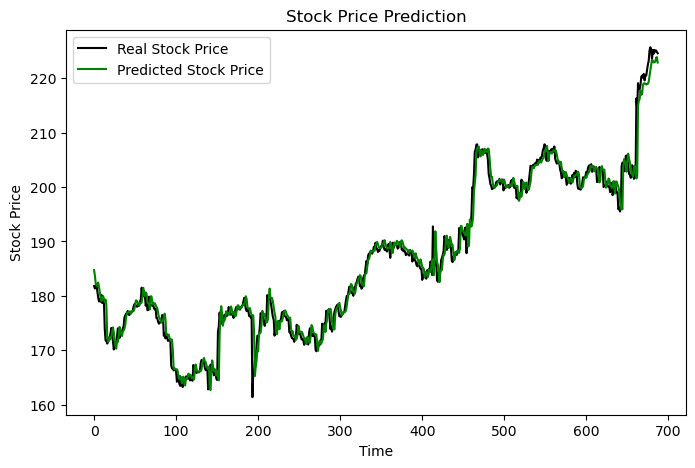

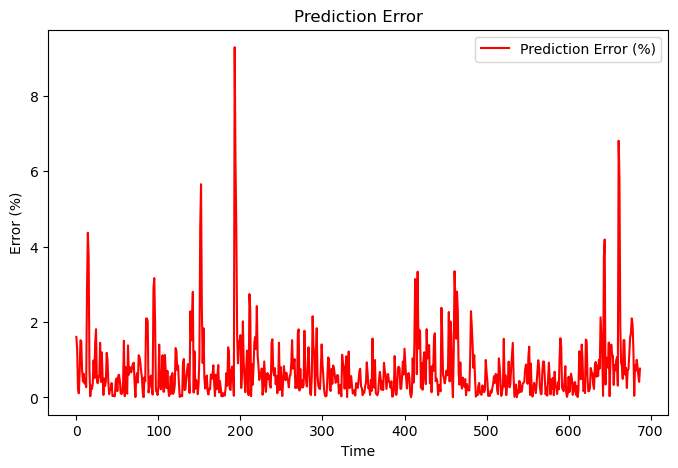

Average Prediction Error (%): 0.7270509886149601
Variance of Prediction Error (%): 0.7305594614650186
R^2 Score: 0.9794779641019621


In [19]:
ada_lstm=train_and_predict_model_lstm(df1_ada, df2_ada, look_back, learning_rate=0.001, epochs=150, batch_size=64)
evaluate_predictions(ada_lstm,df2_ada)

Epoch 1/150


C:\Users\36679\anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1057 - val_loss: 0.0249
Epoch 2/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0225 - val_loss: 0.0225
Epoch 3/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0192 - val_loss: 0.0238
Epoch 4/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0187 - val_loss: 0.0255
Epoch 5/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0165 - val_loss: 0.0188
Epoch 6/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0167 - val_loss: 0.0191
Epoch 7/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0169 - val_loss: 0.0243
Epoch 8/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0167 - val_loss: 0.0151
Epoch 9/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0157 - val_loss: 0.0149
Epoch 10/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0137 - val_loss: 0.0385
Epoch 11/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0190 - val_loss: 0.0149
Epoch 12/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0139 - val_lo

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0116 - val_loss: 0.0121
Epoch 70/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0105 - val_loss: 0.0123
Epoch 71/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0107 - val_loss: 0.0134
Epoch 72/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0123 - val_loss: 0.0124
Epoch 73/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0105 - val_loss: 0.0179
Epoch 74/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0116 - val_loss: 0.0182
Epoch 75/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0130 - val_loss: 0.0149
Epoch 76/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0120 - val_loss: 0.0126
Epoch 77/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0110 - val_loss: 0.0248
Epoch 78/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0124 - val_loss: 0.0126
Epoch 79/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0105 - val_loss: 0.0124
Epoch 80/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0112 

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0109 - val_loss: 0.0124
Epoch 138/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0109 - val_loss: 0.0199
Epoch 139/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0110 - val_loss: 0.0126
Epoch 140/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0106 - val_loss: 0.0128
Epoch 141/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0124 - val_loss: 0.0144
Epoch 142/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0106 - val_loss: 0.0140
Epoch 143/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0110 - val_loss: 0.0132
Epoch 144/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0107 - val_loss: 0.0123
Epoch 145/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0112 - val_loss: 0.0143
Epoch 146/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0108 - val_loss: 0.0125
Epoch 147/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0110 - val_loss: 0.0137
Epoch 148/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

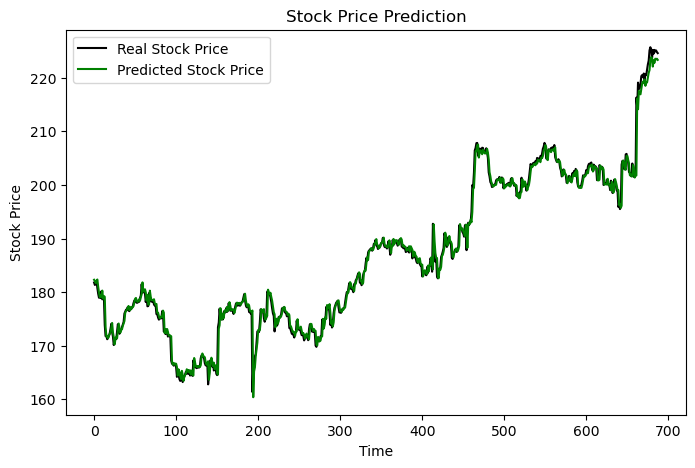

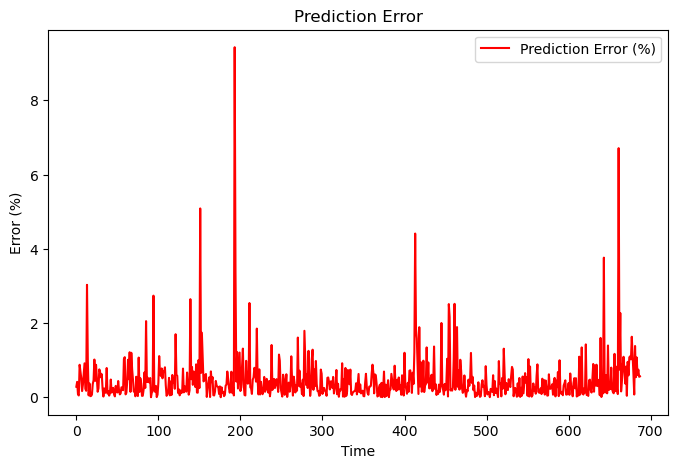

Average Prediction Error (%): 0.4698484250020376
Variance of Prediction Error (%): 0.4440462323039097
R^2 Score: 0.9891829841984032


In [25]:
ada_gru=train_predict_stock_model_gru(df1_ada, df2_ada, look_back)
evaluate_predictions(ada_gru,df2_ada)

In [20]:
df1_goo = pd.read_csv('GOOGL_stock_data_2023.csv')
df2_goo = pd.read_csv('GOOGL_stock_data_2024.csv')

Epoch 1/150


C:\Users\36679\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3253 - val_loss: 0.1218
Epoch 2/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0385 - val_loss: 0.0369
Epoch 3/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0221 - val_loss: 0.0291
Epoch 4/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0202 - val_loss: 0.0246
Epoch 5/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0202 - val_loss: 0.0214
Epoch 6/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0188 - val_loss: 0.0390
Epoch 7/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0235 - val_loss: 0.0322
Epoch 8/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0200 - val_loss: 0.0247
Epoch 9/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0189 - val_loss: 0.0218
Epoch 10/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0191 - val_loss: 0.0212
Epoch 11/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0205 - val_loss: 0.0301
Epoch 12/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0197 - val_lo

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0183 - val_loss: 0.0178
Epoch 70/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0157 - val_loss: 0.0252
Epoch 71/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0166 - val_loss: 0.0217
Epoch 72/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0160 - val_loss: 0.0229
Epoch 73/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0147 - val_loss: 0.0173
Epoch 74/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0162 - val_loss: 0.0226
Epoch 75/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0148 - val_loss: 0.0211
Epoch 76/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158 - val_loss: 0.0428
Epoch 77/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0181 - val_loss: 0.0193
Epoch 78/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0153 - val_loss: 0.0221
Epoch 79/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0181 - val_loss: 0.0364
Epoch 80/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0172 

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0144 - val_loss: 0.0196
Epoch 138/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0173 - val_loss: 0.0341
Epoch 139/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0155 - val_loss: 0.0178
Epoch 140/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0148 - val_loss: 0.0194
Epoch 141/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0148 - val_loss: 0.0170
Epoch 142/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0150 - val_loss: 0.0262
Epoch 143/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0149 - val_loss: 0.0169
Epoch 144/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0160 - val_loss: 0.0205
Epoch 145/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0160 - val_loss: 0.0323
Epoch 146/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0166 - val_loss: 0.0171
Epoch 147/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0156 - val_loss: 0.0203
Epoch 148/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

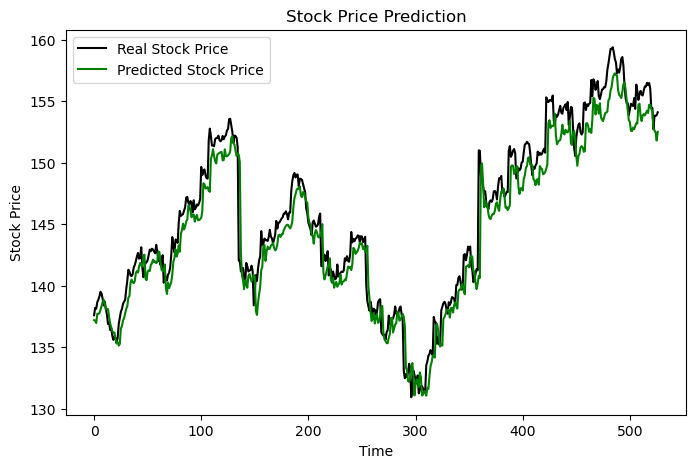

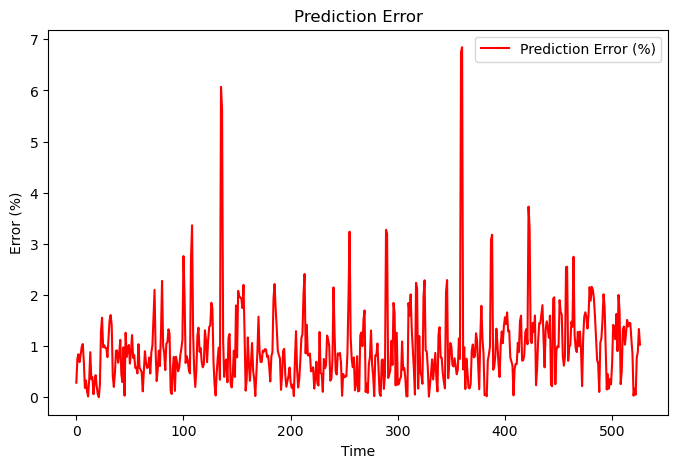

Average Prediction Error (%): 0.956948419786466
Variance of Prediction Error (%): 0.6165147477368061
R^2 Score: 0.9294780898971862


In [23]:
goo_lstm=train_and_predict_model_lstm(df1_goo, df2_goo, look_back, learning_rate=0.001, epochs=150, batch_size=64)
evaluate_predictions(goo_lstm, df2_goo)

Epoch 1/150


C:\Users\36679\anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1874 - val_loss: 0.0338
Epoch 2/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0173 - val_loss: 0.0380
Epoch 3/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0178 - val_loss: 0.0184
Epoch 4/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0153 - val_loss: 0.0316
Epoch 5/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0173 - val_loss: 0.0326
Epoch 6/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0173 - val_loss: 0.0261
Epoch 7/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0154 - val_loss: 0.0172
Epoch 8/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0150 - val_loss: 0.0190
Epoch 9/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0176 - val_loss: 0.0299
Epoch 10/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0161 - val_loss: 0.0197
Epoch 11/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0155 - val_loss: 0.0237
Epoch 12/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0134 - val_lo

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0108 - val_loss: 0.0133
Epoch 70/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0123 - val_loss: 0.0118
Epoch 71/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0112 - val_loss: 0.0106
Epoch 72/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0097 - val_loss: 0.0139
Epoch 73/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0103 - val_loss: 0.0120
Epoch 74/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0100 - val_loss: 0.0125
Epoch 75/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0112 - val_loss: 0.0124
Epoch 76/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0110 - val_loss: 0.0108
Epoch 77/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098 - val_loss: 0.0143
Epoch 78/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0097 - val_loss: 0.0114
Epoch 79/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0099 - val_loss: 0.0109
Epoch 80/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098 

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0096 - val_loss: 0.0105
Epoch 138/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0111 - val_loss: 0.0126
Epoch 139/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0103 - val_loss: 0.0119
Epoch 140/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0124 - val_loss: 0.0187
Epoch 141/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0100 - val_loss: 0.0108
Epoch 142/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0095 - val_loss: 0.0156
Epoch 143/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0106 - val_loss: 0.0357
Epoch 144/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0123 - val_loss: 0.0107
Epoch 145/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0103 - val_loss: 0.0116
Epoch 146/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0095 - val_loss: 0.0140
Epoch 147/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0121 - val_loss: 0.0180
Epoch 148/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

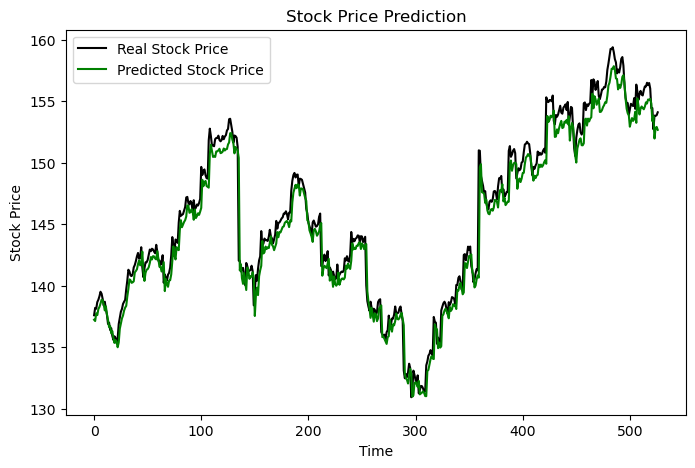

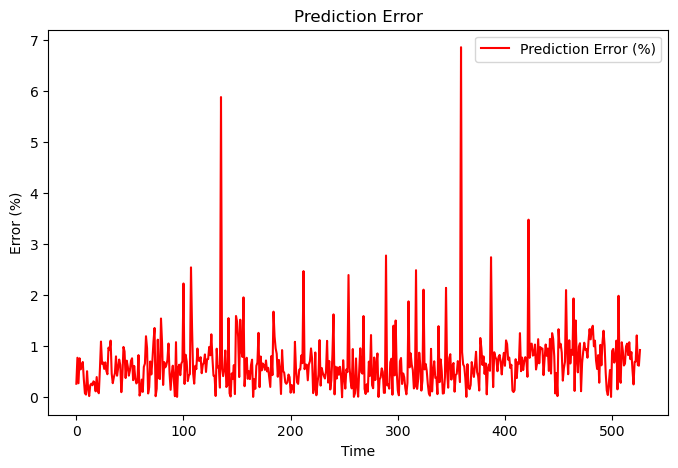

Average Prediction Error (%): 0.6600168828351104
Variance of Prediction Error (%): 0.3339473889919053
R^2 Score: 0.9646858871970212


In [26]:
goo_gru=train_predict_stock_model_gru(df1_goo, df2_goo, look_back)
evaluate_predictions(goo_gru,df2_goo)

In [27]:
df1_tsl = pd.read_csv('TSLA_stock_data_2023.csv')
df2_tsl = pd.read_csv('TSLA_stock_data_2023.csv')

Epoch 1/150


C:\Users\36679\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2629 - val_loss: 0.0404
Epoch 2/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0322 - val_loss: 0.0236
Epoch 3/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0216 - val_loss: 0.0202
Epoch 4/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0193 - val_loss: 0.0196
Epoch 5/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0196 - val_loss: 0.0187
Epoch 6/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0182 - val_loss: 0.0194
Epoch 7/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0194 - val_loss: 0.0217
Epoch 8/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0187 - val_loss: 0.0187
Epoch 9/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0182 - val_loss: 0.0182
Epoch 10/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0185 - val_loss: 0.0175
Epoch 11/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0186 - val_loss: 0.0175
Epoch 12/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0185 - val_lo

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0148 - val_loss: 0.0259
Epoch 70/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0195 - val_loss: 0.0180
Epoch 71/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0155 - val_loss: 0.0151
Epoch 72/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0152 - val_loss: 0.0146
Epoch 73/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0154 - val_loss: 0.0150
Epoch 74/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0155 - val_loss: 0.0161
Epoch 75/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0167 - val_loss: 0.0183
Epoch 76/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0163 - val_loss: 0.0171
Epoch 77/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0162 - val_loss: 0.0147
Epoch 78/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0168 - val_loss: 0.0160
Epoch 79/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158 - val_loss: 0.0147
Epoch 80/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0167 

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0152 - val_loss: 0.0180
Epoch 138/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0163 - val_loss: 0.0141
Epoch 139/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0152 - val_loss: 0.0169
Epoch 140/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0161 - val_loss: 0.0176
Epoch 141/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0169 - val_loss: 0.0144
Epoch 142/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0151 - val_loss: 0.0161
Epoch 143/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0155 - val_loss: 0.0187
Epoch 144/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0159 - val_loss: 0.0145
Epoch 145/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0175 - val_loss: 0.0157
Epoch 146/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0152 - val_loss: 0.0173
Epoch 147/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0161 - val_loss: 0.0152
Epoch 148/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

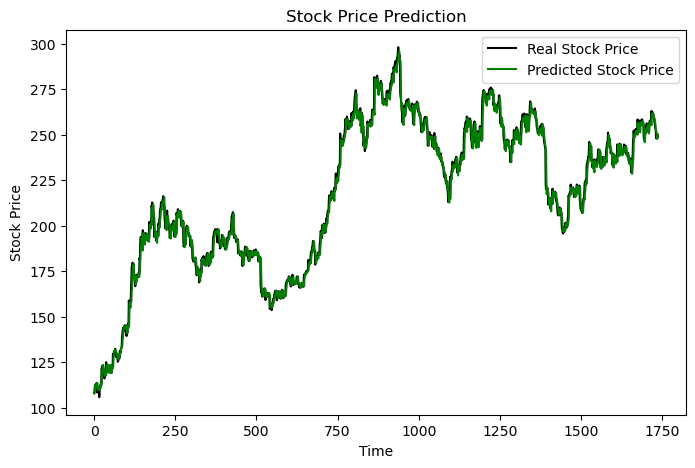

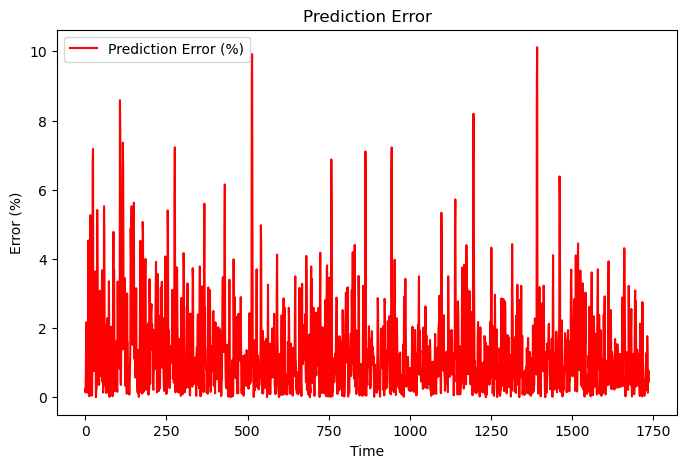

Average Prediction Error (%): 1.3013072183359178
Variance of Prediction Error (%): 1.6264345887696787
R^2 Score: 0.9912737905555195


In [28]:
tsl_lstm=train_and_predict_model_lstm(df1_tsl, df2_tsl, look_back, learning_rate=0.001, epochs=150, batch_size=64)
evaluate_predictions(tsl_lstm, df2_tsl)

Epoch 1/150


C:\Users\36679\anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1514 - val_loss: 0.0220
Epoch 2/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0201 - val_loss: 0.0202
Epoch 3/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0186 - val_loss: 0.0221
Epoch 4/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0180 - val_loss: 0.0154
Epoch 5/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0182 - val_loss: 0.0224
Epoch 6/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0203 - val_loss: 0.0153
Epoch 7/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0168 - val_loss: 0.0174
Epoch 8/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0149 - val_loss: 0.0135
Epoch 9/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0151 - val_loss: 0.0132
Epoch 10/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0141 - val_loss: 0.0126
Epoch 11/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0156 - val_loss: 0.0170
Epoch 12/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0165 - val_lo

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0104 - val_loss: 0.0098
Epoch 70/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098 - val_loss: 0.0089
Epoch 71/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0102 - val_loss: 0.0118
Epoch 72/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0103 - val_loss: 0.0096
Epoch 73/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098 - val_loss: 0.0089
Epoch 74/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0097 - val_loss: 0.0089
Epoch 75/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0112 - val_loss: 0.0099
Epoch 76/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0096 - val_loss: 0.0100
Epoch 77/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0092 - val_loss: 0.0095
Epoch 78/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0096 - val_loss: 0.0106
Epoch 79/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0097 - val_loss: 0.0164
Epoch 80/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0120 

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0090 - val_loss: 0.0089
Epoch 138/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0097 - val_loss: 0.0110
Epoch 139/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0097 - val_loss: 0.0097
Epoch 140/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - val_loss: 0.0097
Epoch 141/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - val_loss: 0.0090
Epoch 142/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0091 - val_loss: 0.0116
Epoch 143/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0103 - val_loss: 0.0092
Epoch 144/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0106 - val_loss: 0.0096
Epoch 145/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0094 - val_loss: 0.0091
Epoch 146/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0101 - val_loss: 0.0104
Epoch 147/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0100 - val_loss: 0.0088
Epoch 148/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

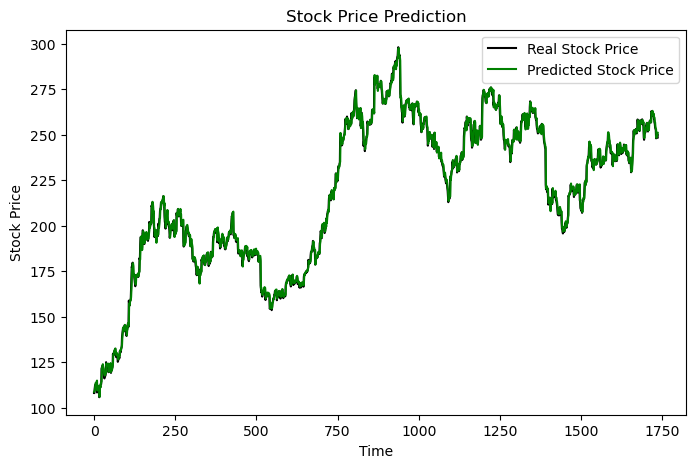

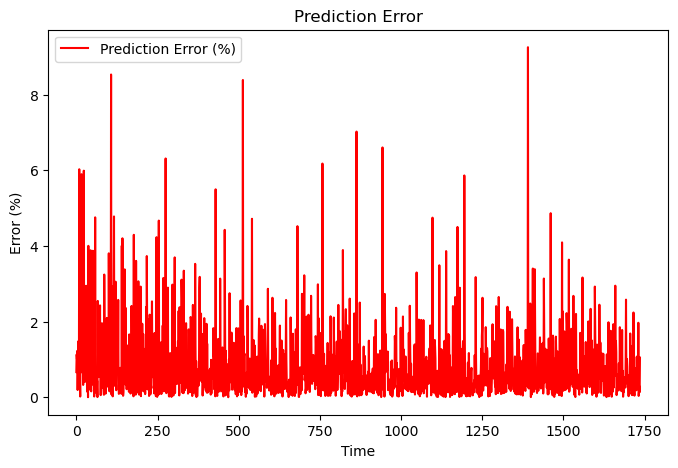

Average Prediction Error (%): 0.8126634008053918
Variance of Prediction Error (%): 0.8665870879705162
R^2 Score: 0.996151082626841


In [29]:
tsl_gru=train_predict_stock_model_gru(df1_tsl, df2_tsl, look_back)
evaluate_predictions(tsl_gru,df2_tsl)